In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

seed=10

import warnings
warnings.filterwarnings("ignore")

## Data import and cleanup

In [3]:
df = pd.read_csv("./epa-sea-level.csv")

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      135 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   22 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [5]:
df[df['CSIRO Adjusted Sea Level'].isna()].index

Index([134], dtype='int64')

In [6]:
df.drop(df[df['CSIRO Adjusted Sea Level'].isna()].index,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [8]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


## Visualising existing data

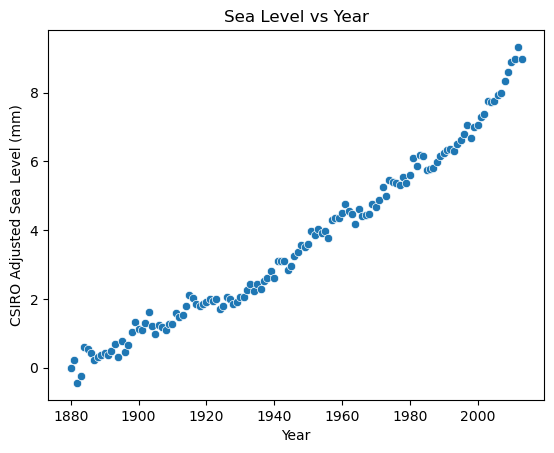

In [10]:
sns.scatterplot(data=df, y='CSIRO Adjusted Sea Level', x='Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.xlabel('Year')
plt.title( "Sea Level vs Year") 
plt.show() 

## Linear regression model and testing GOF

In [12]:
y = df['CSIRO Adjusted Sea Level'].values
X = np.c_[np.ones(df.shape[0]), df['Year'].values]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

model = LinearRegression()
model.fit(Xtrain, ytrain)

rSquared = model.score(Xtrain, ytrain)
print("R-Squared Train =",rSquared)

rSquared = model.score(Xtest, ytest)
print("R-Squared Test =",rSquared)

R-Squared Train = 0.9734396140322417
R-Squared Test = 0.9549455395731593


In [13]:
y_pred = model.predict(Xtest)

In [14]:
mse = mean_squared_error(ytest, y_pred)
mse

0.2902551256130079

## Fit model to the whole dataset and make future predictions

In [16]:
y = df['CSIRO Adjusted Sea Level'].values
X = np.c_[np.ones(df.shape[0]), df['Year'].values]

X_pred = np.array(range(df['Year'].max()+1, 2061))
X_pred = np.c_[np.ones(X_pred.shape[0]), X_pred]

model = LinearRegression()
model.fit(X, y)

y_prede = model.predict(X)
y_predf = model.predict(X_pred)

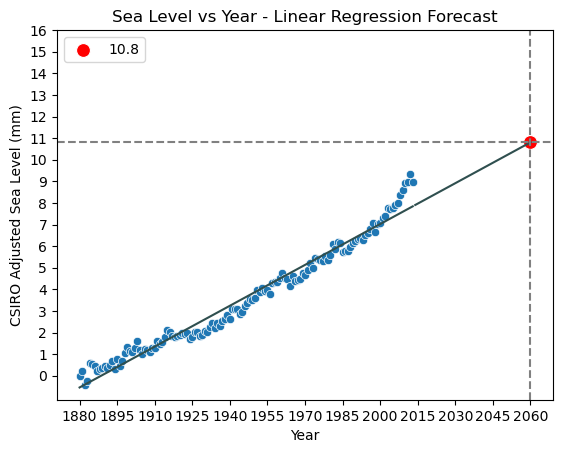

In [38]:
sns.scatterplot(data=df, y='CSIRO Adjusted Sea Level', x='Year')
sns.lineplot(x=X_pred[:,1], y=y_predf, color = 'darkslategrey')
sns.lineplot(x=X[:,1], y=y_prede, color = 'darkslategrey')

sns.scatterplot(x=[X_pred[-1, 1]], y=[y_predf[-1]], color='red', s=100, marker='o', label=round(y_predf[-1],1))
plt.axvline(x=X_pred[-1, 1], color='gray', linestyle='--')  # Vertical line to x-axis
plt.axhline(y=y_predf[-1], color='gray', linestyle='--')     # Horizontal line to y-axis

plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.xlabel('Year')
plt.title( "Sea Level vs Year - Linear Regression Forecast") 
plt.xticks(np.arange(df['Year'].min(), 2061, 15))  # Set x-axis ticks every 5 years
plt.yticks(np.arange(int(df['CSIRO Adjusted Sea Level'].min()), int(y_pred.max()) + 10, 1))  # Set y-axis ticks every 20 mm

plt.savefig('Sea Level 2060.png')

plt.show() 